### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Questions and Variables
#### 3. Correlation Matrix Heatmap
#### 4. Scatterplot
#### 5. Pairplot
#### 6. Categorical Plot
#### 7. Answers to Questions

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

# Importing Data

In [2]:
# Creating a path variable
path = r'C:\Users\Aaron\CareerFoundry\Achievement 6'

In [3]:
# Importing updated 'MLB Players Salaries and Performance' dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salaries_cleaned_data.csv'), index_col = False)

In [4]:
# Checking the dataframe
df.head()

,Unnamed: 0,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,0,6500000,Giancarlo Stanton,325000000,RF,13,2015-27,25000000,MIA,Miami,Florida,USA
1,1,21943026,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
2,2,22000000,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
3,3,28000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA
4,4,33000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA


#### Removing 'Unnamed: 0' Column

In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [6]:
# Checking our work
df.head()

,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,6500000,Giancarlo Stanton,325000000,RF,13,2015-27,25000000,MIA,Miami,Florida,USA
1,21943026,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
2,22000000,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
3,28000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA
4,33000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA


# 2) Questions and Variables

Questions to Explore:
1. Which cities and states pay more?
2. Which positions get paid more?
3. Which positions get awarded longer contracts?
4. Which teams are spending the most on salary?

#### Creating a Subset Excluding 'name, years, country' Variables

In [7]:
sub = df[['salary', 'total_value', 'pos', 'length', 'avg_annual ', 'team', 'city', 'state']]

In [8]:
# Checking the subset
sub.head()

,salary,total_value,pos,length,avg_annual,team,city,state
0,6500000,325000000,RF,13,25000000,MIA,Miami,Florida
1,21943026,292000000,1B,10,29200000,DET,Detroit,Michigan
2,22000000,292000000,1B,10,29200000,DET,Detroit,Michigan
3,28000000,275000000,DH,10,27500000,NYY,Bronx,New York
4,33000000,275000000,DH,10,27500000,NYY,Bronx,New York


# 3) Correlation Matrix Heatmap

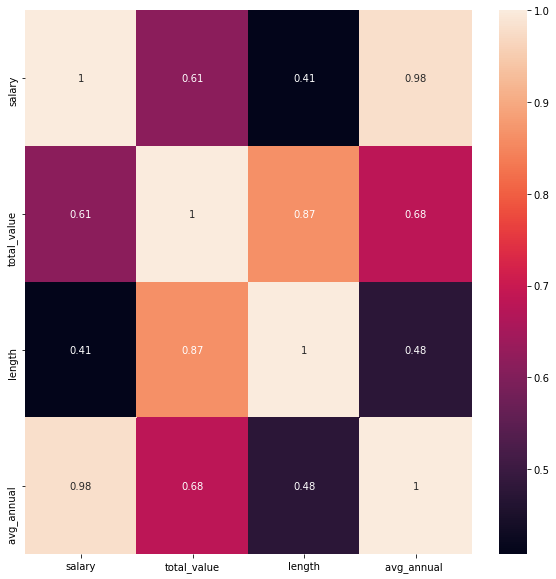

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots define above
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

Explain what the coefficients mean in terms of the relationships between the variables.

1. Salary and:
    - Total Value: a coefficient of 0.61 shows there a medium strength, positive relationship between the two variables. As salary goes up, so does the total value of the contract.
    - Length: a coefficient of 0.41 shows there's a low/medium strength, positive relationship between salary and length. Though not a very strong relationship, it shows that the length of a contract may positively affect the salary's amount.
    - Avg Annual: a coefficient of 0.98 shows that there is a very strong, positive relationship between the two variables. As the annual average of a contract increases, so does the salary amount.
    
    
2. Total Value and:
    - Salary: see above in Salary and Total Value relationship
    - Length: a coefficient of 0.87 shows a very strong, positive relationship between the two variables. As the length of the contract increases, so does the total value.
    - Avg Annual: with a coefficient of 0.68, this shows the two variables have a medium strength, positive relationship. As the annual average increases, it may increase the total value as well.
    
    
3. Length and:
    - Salary: see above in Salary and Length relationship
    - Total Value: see above in Total Value and Length relationship
    - Avg Annual: with a coefficient of 0.48, length and avg annual have a relatively weak relationship. This could mean that as the length of contract gets longer, it may increase the annual average.


4. Avg Annual and:
    - Salary: see above in Salary and Avg Annual
    - Total Value: see above in Total Value and Avg Annual
    - Length: see above in Length and Avg Annual

# 4) Scatterplot

Creating scatterplots for the variables with the strongest correlations.

#### Salary and Avg Annual

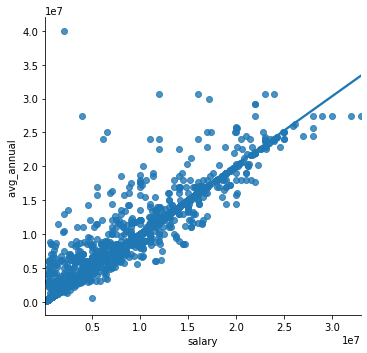

In [11]:
sal_avg_annual = sns.lmplot(x = 'salary', y = 'avg_annual ', data = df)

Salary and Avg Annual have a very strong, positive relationship. Though it gets a bit messy at the beginning, the higher the salary, the higher the annual avg value gets. There are a few exceptions from outliers, notably one at avg annual value 4, 3, and 2.5.

In [13]:
sal_avg_annual.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Salary_Avg_Annual_splot'))

#### Length and Total Value

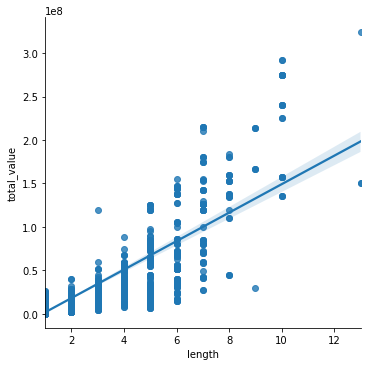

In [14]:
length_tot_val = sns.lmplot(x = 'length', y = 'total_value', data = df)

Though length is a numerical value, it almost looks like this scatterplot is showing a plot of categorical values. It could be due to the fact that the length variables are spread out evenly as whole numbers.

The relationship indeed shows a positive correlation, though it's not a strong relationship since there are plenty of values beyond the trend line, including a few outliers towards the longer length values (7, 9, 10, 12).

In [15]:
length_tot_val.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Length_Tot_Val_splot'))

#### Avg Annual and Total Value

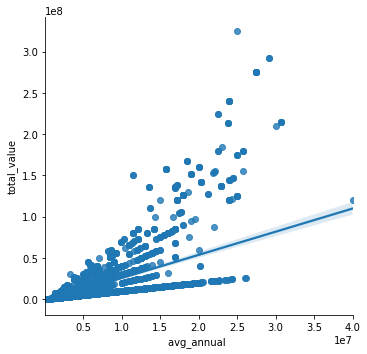

In [17]:
avg_annual_tot_val = sns.lmplot(x = 'avg_annual ', y = 'total_value', data = df)

Avg. Annual and Total Value variables do have a positve relationship; however, it's complicated. As the avg annual increases, so does total value; but they also begin to stray away from the trend line. Total value increases exponentially as avg annual increases.

In [18]:
avg_annual_tot_val.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Avg_Annual_Tot_Val_splot'))

# 5) Pair Plot

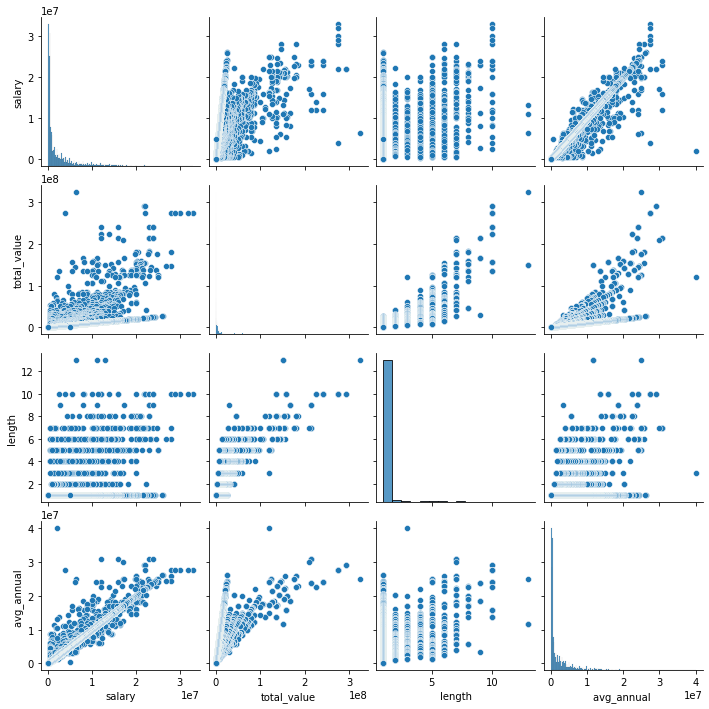

In [19]:
# Create a pair plot
pairplot = sns.pairplot(df)

The plots where the variables meet themselves (salary & salary, total value & total value, length & length, and avg annual & avg annual), are hard to decipher due to the fact that they are all heavily skewed to the right. This could be due to the fact that majority of the values are low, but contracts with HUGE salaries, total_values, and lengths stretch out the data and forces them to skew to the right.

I'm interested in exploring length and avg annual more as I'm curious to learn why it's such a week relationship between the two variables. My assumption would have been that short contracts would lead to higher average, while long contracts lead to lower averages since it has a longer time to pay off the contract. However, I could be wrong since MLB teams often sign players to low salary, short contracts when looking to fill in roster spots temporarily.

I'm also curious about the relationship between salary and total value. Salary is described as the amount of money a player is paid for a season, while total value is the total value of the player's contract. However, even though there's a slight positive correlation between the two variables, it's hard to comprehend their relationship. My guess is that players either get paid one lump sum of the total amount of their contract (which makes salary and total value equal), or their yearly salary is an even annual average of the total value, or some players get more upfront and less as the lifetime of the contract goes on.

In [20]:
pairplot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot'))

# 6) Categorical Plot

### Position

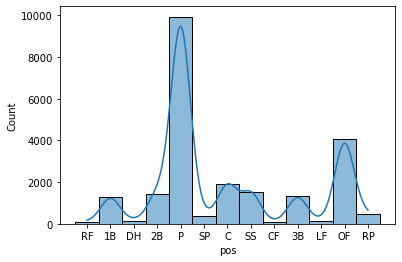

In [21]:
posplot = sns.histplot(df['pos'], bins = 13, kde = True)

Majority of the players within this data set are pitchers. This includes both "P" (pitcher), "SP" (starting pitcher), and "RP" (relief pitcher). Second most are outfielders, and third are catchers.

This is no surprise as baseball teams require many pitchers within their roster to rotate through them throughout the season.

Outfielders are also plentiful as there are multiple outfielders during each inning.

#### Position vs. Avg. Annual

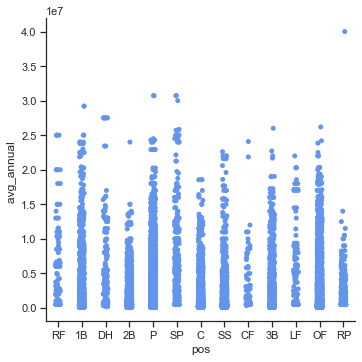

In [22]:
sns.set(style="ticks")
position_salary = sns.catplot(x="pos", y="avg_annual ", color = 'cornflowerblue', data=df)

Wanted to find out which position, on average, gets paid the most.

As we can see, there's an outlier for Pitchers (more specifically, relief pitchers (RP)). Second highest are Pitchers and Starting Pitchers.

First Base Men (1B) follows them, then Designated Hitters (DH), Right Fielders (RH), Third Base Men (3B), and Outfielders (OF).

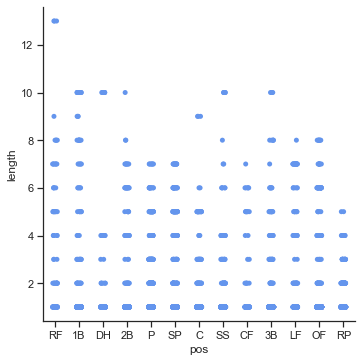

In [23]:
sns.set(style="ticks")
position_length = sns.catplot(x="pos", y="length", color = 'cornflowerblue', data=df)

Positions with the longest contracts are Right Fielders (RH).

However, on average, First Base Men, Designated Hitters, Second Base Men, Short Stops, and Third Base Men have the longest contracts.

### Team

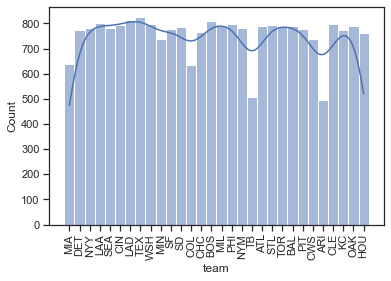

In [24]:
teamplot = sns.histplot(df['team'], bins = 30, kde = True)
# Rotate x axis labels so they don't overlap
teamplot.tick_params(axis='x', rotation=90)

Team distribution is fairly even for the most part except for Miami Marlins, Colorado Rockies, Tampa Bay Rays, and the Arizona Diamondbacks.

#### Team vs. Avg. Annual

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'MIA'),
  Text(1, 0, 'DET'),
  Text(2, 0, 'NYY'),
  Text(3, 0, 'LAA'),
  Text(4, 0, 'SEA'),
  Text(5, 0, 'CIN'),
  Text(6, 0, 'LAD'),
  Text(7, 0, 'TEX'),
  Text(8, 0, 'WSH'),
  Text(9, 0, 'MIN'),
  Text(10, 0, 'SF'),
  Text(11, 0, 'SD'),
  Text(12, 0, 'COL'),
  Text(13, 0, 'CHC'),
  Text(14, 0, 'BOS'),
  Text(15, 0, 'MIL'),
  Text(16, 0, 'PHI'),
  Text(17, 0, 'NYM'),
  Text(18, 0, 'TB'),
  Text(19, 0, 'ATL'),
  Text(20, 0, 'STL'),
  Text(21, 0, 'TOR'),
  Text(22, 0, 'BAL'),
  Text(23, 0, 'PIT'),
  Text(24, 0, 'CWS'),
  Text(25, 0, 'ARI'),
  Text(26, 0, 'CLE'),
  Text(27, 0, 'KC'),
  Text(28, 0, 'OAK'),
  Text(29, 0, 'HOU')])

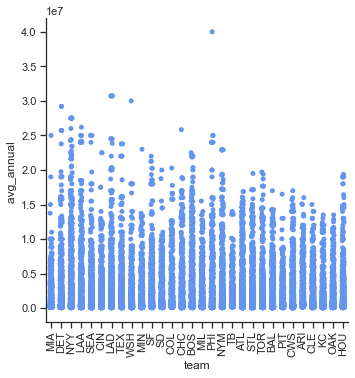

In [25]:
sns.set(style="ticks")
team_avg_annual = sns.catplot(x="team", y="avg_annual ", color = 'cornflowerblue', data=df)
plt.xticks(rotation=90)

Philadelphia Phillies hold the record for the largest average annual contract.

LA Dodgers come in second.

Washington Nationals are third.

### City

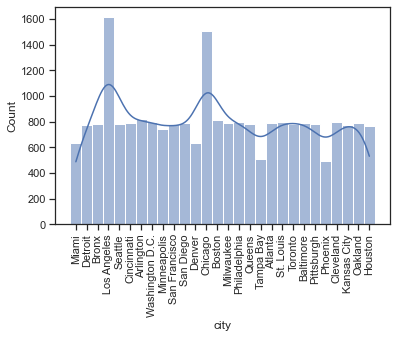

In [26]:
cityplot = sns.histplot(df['city'], bins = 30, kde = True)
# Rotate x axis labels so they don't overlap
cityplot.tick_params(axis='x', rotation=90)

Two cities that stick out the most are Los Angeles and Chicago. This is due to the fact that both LA and Chicago have two teams. LA has the Dodgers and the Angels; while Chicago has the White Sox and the Cubs.

#### City vs. Avg Annual

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Miami'),
  Text(1, 0, 'Detroit'),
  Text(2, 0, 'Bronx'),
  Text(3, 0, 'Los Angeles'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Cincinnati'),
  Text(6, 0, 'Arlington'),
  Text(7, 0, 'Washington D.C.'),
  Text(8, 0, 'Minneapolis'),
  Text(9, 0, 'San Francisco'),
  Text(10, 0, 'San Diego'),
  Text(11, 0, 'Denver'),
  Text(12, 0, 'Chicago'),
  Text(13, 0, 'Boston'),
  Text(14, 0, 'Milwaukee'),
  Text(15, 0, 'Philadelphia'),
  Text(16, 0, 'Queens'),
  Text(17, 0, 'Tampa Bay'),
  Text(18, 0, 'Atlanta'),
  Text(19, 0, 'St. Louis'),
  Text(20, 0, 'Toronto'),
  Text(21, 0, 'Baltimore'),
  Text(22, 0, 'Pittsburgh'),
  Text(23, 0, 'Phoenix'),
  Text(24, 0, 'Cleveland'),
  Text(25, 0, 'Kansas City'),
  Text(26, 0, 'Oakland'),
  Text(27, 0, 'Houston')])

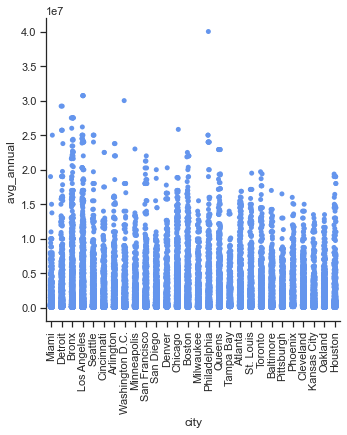

In [27]:
sns.set(style="ticks")
city_avg_annual = sns.catplot(x="city", y="avg_annual ", color = 'cornflowerblue', data=df)
plt.xticks(rotation=90)

The city that has paid the highest average is Philadelphia.

Second highest belongs to Los Angeles.

Third highest goes to Washington DC.

Very similar results to team vs. avg. annual.

#### State

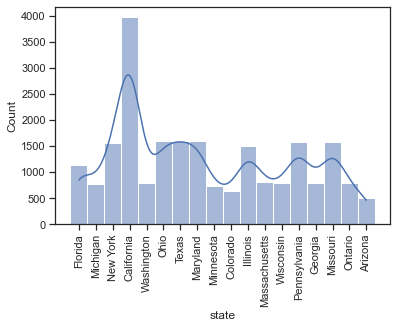

In [28]:
stateplot = sns.histplot(df['state'], bins = 20, kde = True)
# Rotate x axis labels so they don't overlap
stateplot.tick_params(axis='x', rotation=90)

Again, California leads the rest of the categories, however this time by alot. This is due to the fact that there are FIVE California teams: LA Dodgers, LA Angels, SD Padres, SF Giants, and the Oakland A's.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Florida'),
  Text(1, 0, 'Michigan'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Ohio'),
  Text(6, 0, 'Texas'),
  Text(7, 0, 'Maryland'),
  Text(8, 0, 'Minnesota'),
  Text(9, 0, 'Colorado'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Massachusetts'),
  Text(12, 0, 'Wisconsin'),
  Text(13, 0, 'Pennsylvania'),
  Text(14, 0, 'Georgia'),
  Text(15, 0, 'Missouri'),
  Text(16, 0, 'Ontario'),
  Text(17, 0, 'Arizona')])

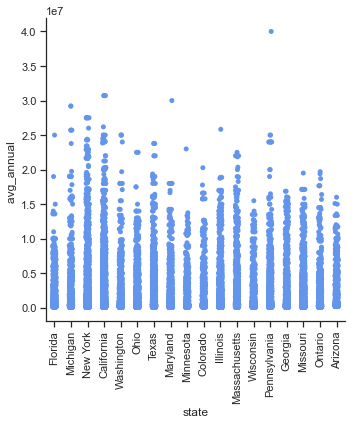

In [29]:
sns.set(style="ticks")
state_avg_annual = sns.catplot(x="state", y="avg_annual ", color = 'cornflowerblue', data=df)
plt.xticks(rotation=90)

The state that has paid the highest average is Pennsylvania. Home to the Philadelphia Phillies.

Second highest is California.

Third is Maryland.

# 7) Answers to the Questions

#### Which cities and states pay more?

The cities that pay the most on average are Philadelphia, Los Angeles, and Washington DC.

The states that pay the most on average are Pennsylvania, California, and Maryland.

#### Which positions get paid more?
The positions that get paid the highest on average are:
1. Pitchers - all kinds (Relief and Starting)
2. First Base Men
3. Designated Hitters
4. Right Fielders
5. Third Base Men
6. Outfielders

#### Which postions have longer contracts?
The positions with the longest contracts are:
1. Right Fielders (outlier)
2. First Base Men
3. Designated Hitters
4. Second Base Men
5. Short Stops
6. Third Base Men

#### Which teams are spending the most on salary?
The teams that are spending the most on salary are:
1. Philadelphia Phillies
2. LA Dodgers
3. Washington Nationals

### Add Any New Questions:

1. More recently, within the past 10 years, which teams, cities, and states are spending the most on average on player contracts?
2. More recently, within the past 10 years, which position gets paid the most?
3. Within this data set, who are the top 5 players that have been awarded the largest total value contract?

# 8) Hypothesis

1. If a player is a pitcher, then they're more likely to receive larger contracts.
2. If a player wants to get paid more in total, then they should opt for a long term contract.
3. If a player wants to get paid more upfront, then they should opt for a short term contract.